In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import glob

data_folder = '/Users/dlvozza/Desktop/lsa-ast361/Work/dlvozza/lab8/galaxy-curve/galaxyData/'

gal_files = glob.glob(data_folder + "galpos*") #This command grabs all of the files starting with "sun_az" in your data folder.
calib_file = glob.glob(data_folder + "calib_pole.dat")
gal_files.sort() #Notably, the "glob" function does NOT sort the list it creates, so we do that here with the "sort" command


1420.4035817826793


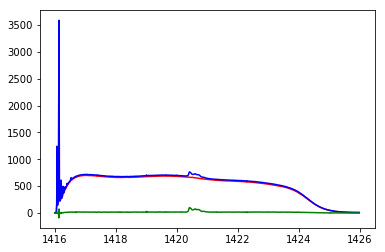

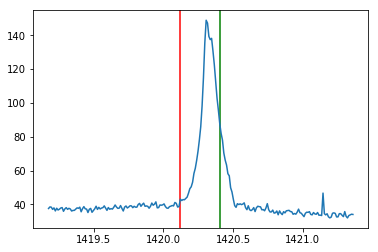

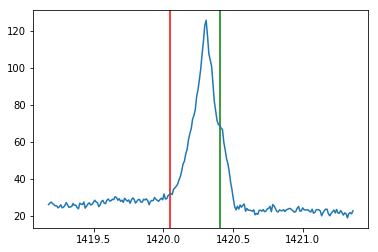

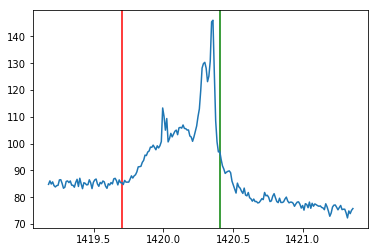

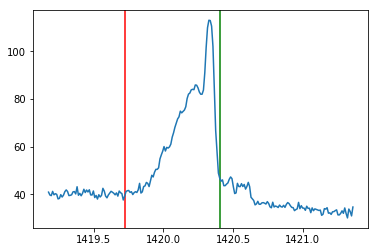

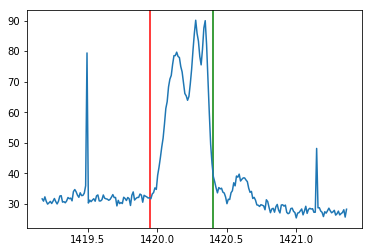

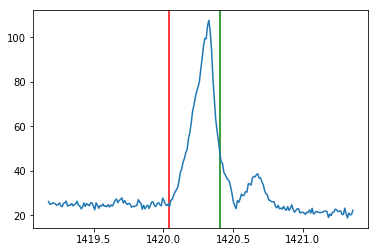

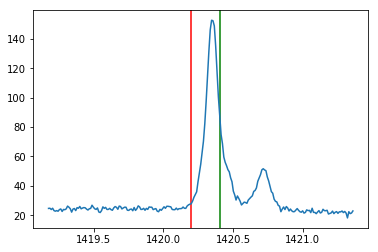

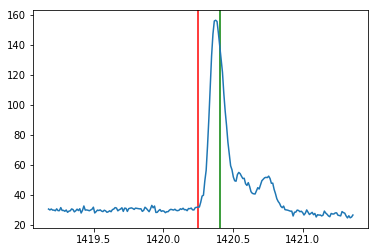

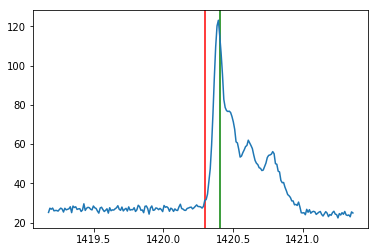

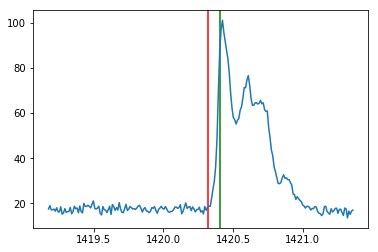

In [3]:
gal_spectra = [] # Create an empty array to later hold each of the spectra from the Galactic scans

with open(calib_file[0]) as calib_data: #This opens up the file and puts each line into a list called calib_data
        
    spectrum_rows = []    # We create a new empty list to put the rows with our spectral data into.
        
    for j, row in enumerate(calib_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as gal_data[j])
        if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
            spectrum_rows.append(row) # Throw every fourth row into our list of spectral data.
                
    tot_spectrum = np.zeros(1024) #Create an array of 1024 0's.
    for row in spectrum_rows: 
        temp_spec = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
        spec = [] # Create an empty list to hold the spectral data
        for val in temp_spec: # Iterate over the elements of your split list.
            if val != '' and val != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                spec.append(val) #Throw the values that are actually fluxes into your spectrum array.
                    
                     
        tot_spectrum = tot_spectrum + np.float64(spec) # Add the data from the current row to your total spectral data for this file.
            
            
    calib_spectra = tot_spectrum/(len(spectrum_rows))
    
for gal_file in gal_files: #Pull each individual filename from the list of Galaxy files
    
    with open(gal_file) as gal_data: #This opens up the file and puts each line into a list called gal_data
        
        spectrum_rows = []    # We create a new empty list to put the rows with our spectral data into.
        
        for j, row in enumerate(gal_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as gal_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
                spectrum_rows.append(row) # Throw every fourth row into our list of spectral data.
                
        tot_spectrum = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows: 
            temp_spec = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec = [] # Create an empty list to hold the spectral data
            for val in temp_spec: # Iterate over the elements of your split list.
                if val != '' and val != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec.append(val) #Throw the values that are actually fluxes into your spectrum array.
                    
                     
            
            tot_spectrum = tot_spectrum + np.float64(spec) # Add the data from the current row to your total spectral data for this file.
        tot_spectrum = tot_spectrum/len(spectrum_rows)  
        example_spec = tot_spectrum
        tot_spectrum = tot_spectrum - calib_spectra    
        gal_spectra.append(tot_spectrum)
        
        
redshift_freqs = [1420.12, 1420.05, 1419.7, 1419.72, 1419.95, 1420.04, 1420.20, 1420.25, 1420.3, 1420.32]
rest_line = ((2.99792*(10**8))/.2110611405413 )/(10**6)
print(rest_line)
freqs = np.arange(1416.0, 1426.0, 0.009766)

plt.plot(freqs, calib_spectra, color = 'r')
plt.plot(freqs, example_spec, color = 'b')
plt.plot(freqs, tot_spectrum, color = 'g')
plt.show()
for i in range(0,len(gal_spectra)):
    
    spectrum = gal_spectra[i]
    plt.axvline(x = redshift_freqs[i], color = 'r')
    plt.axvline(x = rest_line, color = 'g')
    plt.plot(freqs[325:550], spectrum[325:550])
    plt.show()

Radii
[0.0, 1.4103704990108081, 2.7778876040910814, 4.0609999999999991, 5.2207209658740714, 6.2218129670123394, 7.0338583295372104, 7.6321834660231476, 7.9986085699651532, 8.1219999999999999]
frequencies
[1420.12, 1420.05, 1419.7, 1419.72, 1419.95, 1420.04, 1420.2, 1420.25, 1420.3, 1420.32]
Velocities
[70.33309448905942, 122.68997341366165, 232.7032050480199, 262.04755070555058, 243.47676251208642, 249.9677632185232, 236.42379207829927, 240.21752279156721, 237.69979485429775, 234.96086638078981]
Errors
[21.10611405413, 21.10611405413, 21.10611405413, 21.10611405413, 21.10611405413, 21.10611405413, 21.10611405413, 21.10611405413, 21.10611405413, 21.10611405413]


<Container object of 3 artists>

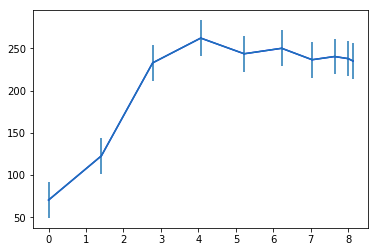

In [8]:
velocities = []
errors = []
longitudes = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
vlsr = [10.48,  9.86, 8.96, 7.77, 6.33, 4.70, 2.93, 1.07, -0.82, -2.68]
radii = []

for i, freq in enumerate(redshift_freqs):
    velocities.append((((rest_line-freq)/rest_line)*(2.99792*(10**5)))+(np.sin((np.pi/180)*longitudes[i])*220) + vlsr[i])
    radii.append(8.122*np.sin((np.pi/180)*longitudes[i]))
    errors.append( 299792 * (.1 / rest_line))

print("Radii")
print(radii)
print('frequencies')
print(redshift_freqs)
print('Velocities')
print(velocities)
print('Errors')
print(errors)                 
plt.plot(radii, velocities,color = 'b')
plt.errorbar(radii,velocities,errors)